# Comparison of action-value methods
## sample averages VS a constant step-size parameter
Exercise 2.5 (programming) 
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q∗(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q∗(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of 10,000 steps.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from numpy.random import normal
np.random.seed(2021)

In [3]:
def generate_r(num_of_arms = 10, centre = 0, sd = 0):
    return normal(centre, sd, num_of_arms)

def update_r(r, step_centre = 0, step_sd = 0.01):
    step = normal(step_centre, step_sd, r.shape)
    return np.add(r, step)

def get_r(r, sd = 1):
    return normal(r, sd)

update_r(generate_r(), 0, 0.01)

array([ 0.00124207, -0.00837953,  0.00409016,  0.00102751, -0.01907722,
        0.01100224, -0.01402325, -0.00225081, -0.01336206,  0.00303722])

In [111]:
# if alpha is None, use sample average
# else use alpha as a constant step-size parameter
class rl:
    
    def __init__(self, num_of_arms = 10, epsilon = 0.1, alpha = None, init_q = None):
        self.num_of_arms = num_of_arms
        self.q = np.zeros(num_of_arms)
        if(init_q != None):
            self.q = init_q
        self.actions = []
        self.count = np.zeros(num_of_arms)
        self.rewards = []
        self.epsilon = epsilon
        self.alpha = alpha
        
    def step(self, r):
        if np.random.uniform(0, 1) > self.epsilon:
            action = np.argmax(self.q)
        else:
            action = np.random.randint(0, self.num_of_arms)
        self.actions.append(action)
        self.rewards.append(r[action])
        self.count[action] += 1
        
        if(self.alpha != None):
            self.q[action] += self.alpha * (r[action] - self.q[action])
        else:
            self.q[action] += (1/self.count[action]) * (r[action] - self.q[action])
        

In [112]:
def optimal_action(ref, cand):
    assert len(ref) == len(cand)
    assert len(ref) != 0
    cnt = 0
    res = []
    for i in range(len(ref)):
        if ref[i] == cand[i]:
            cnt += 1
        res.append(cnt / (i+1))
    return res

def average_reward(rewards):
    acc_r = 0
    res = []
    for i in range(len(rewards)):
        acc_r += rewards[i]
        res.append(acc_r / (i+1))
    return res

## Stationary case

In [113]:
from tqdm import tqdm 

r_c = 0
r_sd = 1

r_update_c = 0
r_update_sd = 0.01

num_of_epochs = 1000
num_of_reperitions = 200

rl1_ars = np.zeros(num_of_epochs)
rl2_ars = np.zeros(num_of_epochs)

rl1_oas = np.zeros(num_of_epochs)
rl2_oas = np.zeros(num_of_epochs)

for i in tqdm(range(num_of_reperitions)):
    r_record = []
    r_max_record = []
    r = generate_r(centre = r_c, sd = r_sd)

    rl1 = rl()
    rl2 = rl(alpha = 0.1)

    for i in range(num_of_epochs):
        this_r = get_r(r)
        r_record.append(this_r)
        r_max_record.append(np.argmax(r))

        rl1.step(this_r)
        rl2.step(this_r)

#         r = update_r(r, 0, 0.01)
        
    rl1_ars += np.array(rl1.rewards)
    rl2_ars += np.array(rl2.rewards)

    rl1_oas += np.equal(np.array(r_max_record),np.array(rl1.actions))
    rl2_oas += np.equal(np.array(r_max_record),np.array(rl2.actions))
    

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.18it/s]


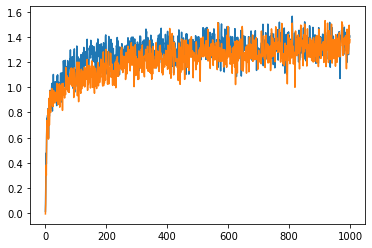

In [114]:
import matplotlib.pyplot as plt
plt.plot(rl1_ars / num_of_reperitions )
plt.plot(rl2_ars / num_of_reperitions )

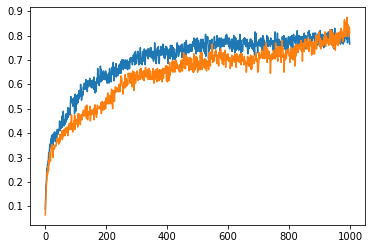

In [115]:
plt.plot(rl1_oas / num_of_reperitions)
plt.plot(rl2_oas / num_of_reperitions)

## Nonstationary case

In [119]:
r_c = 0
r_sd = 1

r_update_c = 0
r_update_sd = 0

num_of_epochs = 10000
num_of_reperitions = 1000

rl1_ars = np.zeros(num_of_epochs)
rl2_ars = np.zeros(num_of_epochs)

rl1_oas = np.zeros(num_of_epochs)
rl2_oas = np.zeros(num_of_epochs)

for i in tqdm(range(num_of_reperitions)):
    r_record = []
    r_max_record = []
    r = generate_r(centre = r_c, sd = 0)

    rl1 = rl()
    rl2 = rl(alpha = 0.1)

    for i in range(num_of_epochs):
        this_r = get_r(r)
        r_record.append(this_r)
        r_max_record.append(np.argmax(r))

        rl1.step(this_r)
        rl2.step(this_r)

        r = update_r(r, 0, 0.01)
        
    rl1_ars += np.array(rl1.rewards)
    rl2_ars += np.array(rl2.rewards)

    rl1_oas += np.equal(np.array(r_max_record),np.array(rl1.actions))
    rl2_oas += np.equal(np.array(r_max_record),np.array(rl2.actions))
    

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [18:25<00:00,  1.11s/it]


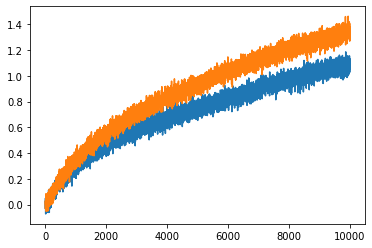

In [120]:
plt.plot(rl1_ars / num_of_reperitions )
plt.plot(rl2_ars / num_of_reperitions )

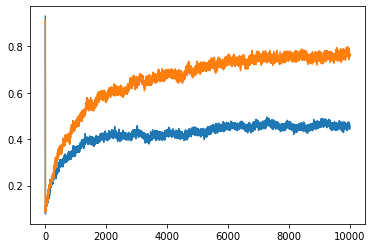

In [121]:
plt.plot(range(num_of_epochs), rl1_oas / num_of_reperitions)
plt.plot(range(num_of_epochs), rl2_oas / num_of_reperitions)